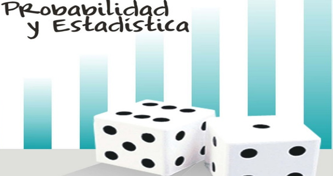

 

# EJERCICIO 1 - Paradoja del Cumpleaños: *la coincidencia de cumpleaños*

La paradoja del cumpleaños, nos propone las siguientes preguntas: 
- ¿Cuál es la probabilidad de que, en un grupo de personas elegidas al azar, al menos dos de ellas hayan nacido el mismo día del año? 
- ¿Cuántas personas son necesarias para asegurar una probabilidad mayor al 50%?. 

> *Es bastante curioso: si suponemos un año con 365 días y teniendo asumiendo que los 365 días de posibles cumpleaños son igualmente probables, podríamos darnos cuenta de que, en un grupo de sólo 20 personas, la probabilidad de que al menos dos de ellas hayan nacido el mismo día del año es mayor al 0.40 !!!.*

Supongamos un grupo de 40 personas. 

## SOLUCIÓN

Vamos a utilizar 
<center>$ p(A) = 1-p(Contrario de A) $


In [9]:
probabilidad_buscada = 1.0
personas = 20

for i in range(personas):
    probabilidad_buscada = probabilidad_buscada * (365-i)/365

print("Probabilidad de que al menos dos de ellas hayan nacido el mismo día del año {0:.4f}"
      .format(1 - probabilidad_buscada))

Probabilidad de que al menos dos de ellas hayan nacido el mismo día del año 0.4114



# EJERCICIO 2 - MONTY HALL: ¿*Que puerta elegir*?

El problema del Monty Hall es un famoso ejemplo que ilustra muy bien lo poco que podemos fiarnos de nuestra intuición cuando se trata de calcular probabilidades. 

- El problema consiste en un concurso en el que tenemos un presentador, un concursante y tres puertas cerradas. - - Detrás de cada una de ellas se esconde uno de estos tres objetos: una cabra, un coche y otra cabra. 
- El concurso consiste en escoger una de las puertas, y el premio es lo que haya detrás de ella: o bien un coche, o bien una cabra. 
- El presentador sabe en todo momento dónde está el coche, pero el concursante, obviamente, no. 

El concurso se gana si detrás de la puerta escogida nos encontramos al coche y no un bóvido doméstico.
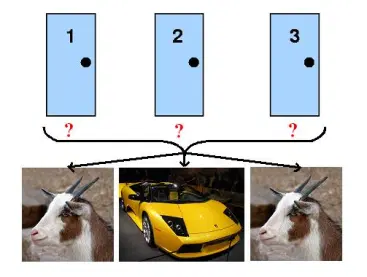

- El concursante escoge una de las tres puertas, por ejemplo, la primera. En esta situación, la probabilidad de ganar el concurso es de una entre tres, pues solo una de las tres puertas esconde al coche. 
- Pero cuando el concursante hace la elección, el presentador no abre la puerta escogida sino que abre una de las otras dos, en la que sabe que hay una cabra, y le pregunta al concursante si quiere mantener su elección o cambiar de puerta. 

**¿Qué hacer ? ¿Es mejor cambiar de puerta, no hacerlo, o da exactamente igual?**


(**Selección condicionada**) Un aspecto crítico del problema es darse cuenta de que la elección de la puerta a descartar por el presentador, no es una decisión al azar. El presentador puede descartar una puerta porque él sabe qué puerta hemos seleccionado y qué puerta tiene el premio. De hecho, en muchos casos, el presentador debe quitar una puerta específica. Por ejemplo, si seleccionamos la puerta 1 y el premio está detrás de la puerta 3, el presentador no tiene otra opción que retirar la puerta 2. Es decir, que la elección de la puerta a descartar está condicionada tanto por la puerta con el premio como por la puerta que seleccionamos inicialmente. Este hecho, cambia totalmente la naturaleza del juego, y hace que las probabilidades de ganar sean 2/3 si cambiamos de puerta.

## SOLUCIÓN

In [14]:
# Función para elegir una puerta: devuelve 1, 2, o 3 en forma aleatoria.
def elegir_puerta():
    
    return np.random.randint(1,4)


"""
    Clase para modelar el problema de Monty Hall.
"""
class MontyHall:

    # Crea la instancia del problema. 
    def __init__(self):
                
        # Elige una puerta en forma aleatoria.
        self.puerta_ganadora = elegir_puerta()
        
        # variables para la puerta elegida y la puerta descartada
        self.puerta_elegida = None
        self.puerta_descartada = None
 
    
    # Selecciona la puerta del concursante en forma aleatoria
    def selecciona_puerta(self):
        
        self.puerta_elegida = elegir_puerta()
 
    
    # Con este método el presentador descarta una de la puertas.
    def descarta_puerta(self):
        
        # elegir puerta en forma aleatoria .
        d = elegir_puerta()
        
        # Si es al puerta ganadora o la del concursante, volver a elegir.
        while d == self.puerta_ganadora or d == self.puerta_elegida:
            d = elegir_puerta()
        
        # Asignar el valor a puerta_descartada.
        self.puerta_descartada = d
 
    
    # Cambia la puerta del concursante una vez que se elimino una puerta
    def cambiar_puerta(self):
        
        # 1+2+3=6. Solo existe una puerta para elegir.
        self.puerta_elegida = 6 - self.puerta_elegida - self.puerta_descartada
 
    
    # Determina si el concursante gana. Devuelve True si gana, False si pierde.
    def gana_concursante(self):
        
        return self.puerta_elegida == self.puerta_ganadora
            
 
    # Juego
    # Una vez que la clase se inicio, jugar el concurso.'cambiar' determina si el concursante cambia su elección.
    
    def jugar(self, cambiar=True):
        
        # El concursante elige una puerta.
        self.selecciona_puerta()
        
        # El presentador elimina una puerta.
        self.descarta_puerta()
        
        # El concursante cambia su elección.
        if cambiar:
            self.cambiar_puerta()
        # Determinar si el concursante ha ganado.
        return self.gana_concursante()

In [20]:
# JUGEMOS: 
# PRIMERO: siempre cambiando la elección inicial
# Vamos a ejecutar el experimiento 10.000 veces.

gana, pierde = 0, 0
for i in range(10000):
    
    # Crear la instancia del problema.
    s2 = MontyHall()
    
    # ejecutar el concurso sin cambiar de puerta..
    if s2.jugar(cambiar=True):
        # si devuelve True significa que gana.
        gana += 1
    else:
        # si devuelve False significa que pierde.
        pierde += 1

# veamos la fecuencia de victorias del concursante.
porc_gana = 100.0 * gana / (gana + pierde)

print("RESULTADOS: 10.000 veces el juego, cambiando de puerta:")
print("    Gana: {0:} concursos".format(gana))
print("    Pierde: {0:} concursos".format(pierde))
print("    Probabilidad: {0:.2f} procentaje de victorias".format(porc_gana))

RESULTADOS: 10.000 veces el juego, cambiando de puerta:
    Gana: 6682 concursos
    Pierde: 3318 concursos
    Probabilidad: 66.82 procentaje de victorias


In [21]:
# JUGEMOS: 
# PRIMERO: siempre sin cambiar la elección inicial
# Vamos a ejecutar el experimiento 10.000 veces.

gana, pierde = 0, 0
for i in range(10000):
    
    # Crear la instancia del problema.
    s2 = MontyHall()
    
    # ejecutar el concurso sin cambiar de puerta..
    if s2.jugar(cambiar=False):
        # si devuelve True significa que gana.
        gana += 1
    else:
        # si devuelve False significa que pierde.
        pierde += 1

# veamos la fecuencia de victorias del concursante.
porc_gana = 100.0 * gana / (gana + pierde)
 
print("RESULTADOS: 10.000 veces el juego, sin cambiar de puerta:")
print("    Gana: {0:} concursos".format(gana))
print("    Pierde: {0:} concursos".format(pierde))
print("    Probabilidad: {0:.2f} procentaje de victorias".format(porc_gana))

RESULTADOS: 10.000 veces el juego, sin cambiar de puerta:
    Gana: 3404 concursos
    Pierde: 6596 concursos
    Probabilidad: 34.04 procentaje de victorias


Así podemos ver, que si utilizamos la estrategia de siempre cambiar de puerta, podemos ganar el concurso un 66% de las veces; mientras que si nos quedamos con nuestra elección inicial, solo ganaríamos el 33% de las veces.


Las situaciones, propiamente dichas, son dos, si atendemos a los escenarios del juego:

- ELIGE COCHE – el presentador abre la puerta con UNA CABRA – CAMBIA entonces *PIERDE*
- ELIGE CABRA – el presentador abre la puerta con UNA CABRA – CAMBIA entonces *GANA*

Lo que ocurre es que la primera opción sólo puede darse de una manera, pues solo hay un coche, mientras que la segunda puede darse de dos formas diferentes, pues hay dos cabras. 

Así, la probabilidad de que cambies de puerta y pierdas es de uno entre tres, mientras que la de que cambies de puerta y ganes es de dos entre tres.

##### Matemáticamente: 


Definimos los siguientes sucesos y asumimos que hay dos tipos de jugador, los que nunca cambian de puerta y los que cambian siempre.

- A: el jugador selecciona la puerta que contiene el coche en su selección inicial.
- B: el jugador selecciona una puerta que contiene una cabra en su selección inicial.
- G: el jugador gana el coche.

Así, hemos de ver que tipo de jugador tiene la mayor probabilidad de ganar el coche.

por consiguiente, hemos de calcular **p(G)** para cada tipo de jugador.

Así: 

    - p(G)=p((G ∩ A) U (G ∩ B)), como A ∩ B = Ø(suceso imposible) y A U B = E (espacio muestral/suceso seguro):

    - p(G)=p((G ∩ A) U (G ∩ B)) = p(G ∩ A) + p(G ∩ B)= p(G/A)P(A) + p(G/B)P(B)

En cualquier caso, dado que no tenemos ninguna razón para pensar lo contrario, diremos que P(A) = 1/3 y P(B) = 2/3 pues hay un coche y dos cabras

Así pues:

> *Jugador A* (el jugador selecciona la puerta que contiene el coche en su selección inicial). En este caso:
                  P(G|A) = 1 y P(G|B) = 0, 
  pues el jugador se queda con su selección inicial.
  Por ende: P(G) = 1/3.

> *Jugador* B (el jugador selecciona una puerta que contiene una cabra en su selección inicial). En este caso:
                  P(G|A) = 0 y P(G|B) = 1, 
  pues el jugador se cambia a la única puerta cerrada que queda (y sabemos que como el presentador sabe donde       esta el coche, siempre mostrará una cabra).
  Por ende: P(G) = 2/3.

*Por consiguiente, estrategia con mayor probabilidad de ganar es cambiar siempre*